In [1]:
import numpy as np
import xarray as xr
import os.path as op
from xmitgcm import open_mdsdataset
import xgcm.grid as xgd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ddir = '/swot/SUM05/takaya/MITgcm/channel/runs/'

In [3]:
ds = open_mdsdataset(op.join(ddir,'res10km_2804_nutrientoutputs/'), grid_dir=ddir,
                     iters=range(1036944,1296144,144),
                     prefix=['FeT_tave'], 
                     delta_t=6e2
                    )
ds

/home/takaya/xmitgcm/xmitgcm/utils.py:314: UserWarning: Not sure what to do with rlev = L
  warnings.warn("Not sure what to do with rlev = " + rlev)
/home/takaya/xmitgcm/xmitgcm/mds_store.py:235: FutureWarning: iteration over an xarray.Dataset will change in xarray v0.11 to only include data variables, not coordinates. Iterate over the Dataset.variables property instead to preserve existing behavior in a forwards compatible manner.
  for vname in ds:


<xarray.Dataset>
Dimensions:   (XC: 100, XG: 100, YC: 200, YG: 200, Z: 40, Zl: 40, Zp1: 41, Zu: 40, time: 1800)
Coordinates:
  * XC        (XC) >f4 5000.0 15000.0 25000.0 35000.0 45000.0 55000.0 ...
  * YC        (YC) >f4 5000.0 15000.0 25000.0 35000.0 45000.0 55000.0 ...
  * XG        (XG) >f4 0.0 10000.0 20000.0 30000.0 40000.0 50000.0 60000.0 ...
  * YG        (YG) >f4 0.0 10000.0 20000.0 30000.0 40000.0 50000.0 60000.0 ...
  * Z         (Z) >f4 -5.0 -15.0 -25.0 -36.0 -49.0 -64.0 -81.5 -102.0 -126.0 ...
  * Zp1       (Zp1) >f4 0.0 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 -113.0 ...
  * Zu        (Zu) >f4 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 -113.0 ...
  * Zl        (Zl) >f4 0.0 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 -113.0 ...
    rA        (YC, XC) >f4 dask.array<shape=(200, 100), chunksize=(200, 100)>
    dxG       (YG, XC) >f4 dask.array<shape=(200, 100), chunksize=(200, 100)>
    dyG       (YC, XG) >f4 dask.array<shape=(200, 100), chunksize=(200, 100)>
    Depth     (YC

In [4]:
grid = xgd.Grid(ds, periodic=['X'])

In [5]:
dsMom = open_mdsdataset(op.join(ddir,'res10km_2804_momentum/'), grid_dir=ddir,
                        iters=range(1036944,1296144,144),
                        prefix=['xyMom_tave','zMom_tave'], 
                        delta_t=6e2
                       )
dsMom

/home/takaya/xmitgcm/xmitgcm/mds_store.py:721: UserWarning: Couldn't find available_diagnostics.log in /swot/SUM05/takaya/MITgcm/channel/runs/res10km_2804_momentum/. Using default version.
  "in %s. Using default version." % data_dir)
/home/takaya/xmitgcm/xmitgcm/utils.py:314: UserWarning: Not sure what to do with rlev = L
  warnings.warn("Not sure what to do with rlev = " + rlev)
/home/takaya/xmitgcm/xmitgcm/mds_store.py:235: FutureWarning: iteration over an xarray.Dataset will change in xarray v0.11 to only include data variables, not coordinates. Iterate over the Dataset.variables property instead to preserve existing behavior in a forwards compatible manner.
  for vname in ds:


<xarray.Dataset>
Dimensions:  (XC: 100, XG: 100, YC: 200, YG: 200, Z: 40, Zl: 40, Zp1: 41, Zu: 40, time: 1800)
Coordinates:
  * XC       (XC) >f4 5000.0 15000.0 25000.0 35000.0 45000.0 55000.0 65000.0 ...
  * YC       (YC) >f4 5000.0 15000.0 25000.0 35000.0 45000.0 55000.0 65000.0 ...
  * XG       (XG) >f4 0.0 10000.0 20000.0 30000.0 40000.0 50000.0 60000.0 ...
  * YG       (YG) >f4 0.0 10000.0 20000.0 30000.0 40000.0 50000.0 60000.0 ...
  * Z        (Z) >f4 -5.0 -15.0 -25.0 -36.0 -49.0 -64.0 -81.5 -102.0 -126.0 ...
  * Zp1      (Zp1) >f4 0.0 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 -113.0 ...
  * Zu       (Zu) >f4 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 -113.0 ...
  * Zl       (Zl) >f4 0.0 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 -113.0 ...
    rA       (YC, XC) >f4 dask.array<shape=(200, 100), chunksize=(200, 100)>
    dxG      (YG, XC) >f4 dask.array<shape=(200, 100), chunksize=(200, 100)>
    dyG      (YC, XG) >f4 dask.array<shape=(200, 100), chunksize=(200, 100)>
    Depth    

In [24]:
nys,nyn = (50,150)
# ds = ds.isel(YC=slice(nys[0],None), YG=slice(nys[0],None))
# dsMom = dsMom.isel(YC=slice(nys[0],None), YG=slice(nys[0],None))
# ds = ds.isel(YC=slice(nys[0],nys[1]), YG=slice(nys[0],nys[1]))
# dsMom = dsMom.isel(YC=slice(nys[0],nys[1]), YG=slice(nys[0],nys[1]))
# ds

In [6]:
ds.YC

<xarray.DataArray 'YC' (YC: 100)>
array([ 505000.,  515000.,  525000.,  535000.,  545000.,  555000.,  565000.,
        575000.,  585000.,  595000.,  605000.,  615000.,  625000.,  635000.,
        645000.,  655000.,  665000.,  675000.,  685000.,  695000.,  705000.,
        715000.,  725000.,  735000.,  745000.,  755000.,  765000.,  775000.,
        785000.,  795000.,  805000.,  815000.,  825000.,  835000.,  845000.,
        855000.,  865000.,  875000.,  885000.,  895000.,  905000.,  915000.,
        925000.,  935000.,  945000.,  955000.,  965000.,  975000.,  985000.,
        995000., 1005000., 1015000., 1025000., 1035000., 1045000., 1055000.,
       1065000., 1075000., 1085000., 1095000., 1105000., 1115000., 1125000.,
       1135000., 1145000., 1155000., 1165000., 1175000., 1185000., 1195000.,
       1205000., 1215000., 1225000., 1235000., 1245000., 1255000., 1265000.,
       1275000., 1285000., 1295000., 1305000., 1315000., 1325000., 1335000.,
       1345000., 1355000., 1365000., 13750

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/xarray/plot/utils.py:51: FutureWarning: 'pandas.tseries.converter.register' has been moved and renamed to 'pandas.plotting.register_matplotlib_converters'. 
  converter.register()


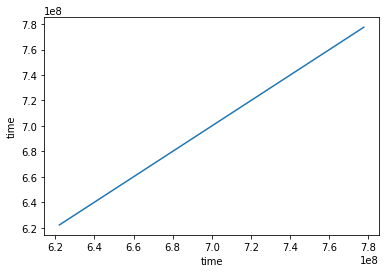

In [7]:
ds.time.plot()

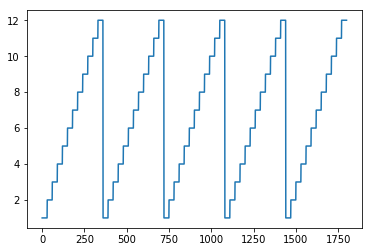

In [7]:
n_years = 5
# month = np.repeat(np.repeat(np.arange(1, 13), 30), n_years)
month = np.tile(np.repeat(np.arange(1, 13), 30), n_years)
plt.plot(month)

In [8]:
dsMom['month'] = ('time', month)
ds['month'] = ('time', month)
dsMom.month

<xarray.DataArray 'month' (time: 1800)>
array([ 1,  1,  1, ..., 12, 12, 12])
Coordinates:
    iter     (time) int64 dask.array<shape=(1800,), chunksize=(1,)>
  * time     (time) float64 6.222e+08 6.223e+08 6.223e+08 6.224e+08 ...

In [9]:
dsMom_clim = dsMom.mean(dim=('XC', 'XG')).groupby('month').mean(dim='time')
ds_clim = ds.mean(dim=('XC', 'XG')).groupby('month').mean(dim='time')
dsMom_clim

<xarray.Dataset>
Dimensions:  (YC: 200, YG: 200, Z: 40, Zl: 40, Zp1: 41, Zu: 40, month: 12)
Coordinates:
  * YC       (YC) >f4 5000.0 15000.0 25000.0 35000.0 45000.0 55000.0 65000.0 ...
  * YG       (YG) >f4 0.0 10000.0 20000.0 30000.0 40000.0 50000.0 60000.0 ...
  * Z        (Z) >f4 -5.0 -15.0 -25.0 -36.0 -49.0 -64.0 -81.5 -102.0 -126.0 ...
  * Zp1      (Zp1) >f4 0.0 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 -113.0 ...
  * Zu       (Zu) >f4 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 -113.0 ...
  * Zl       (Zl) >f4 0.0 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 -113.0 ...
    drC      (Zp1) float64 5.0 10.0 10.0 11.0 13.0 15.0 17.5 20.5 24.0 28.0 ...
    drF      (Z) >f4 10.0 10.0 10.0 12.0 14.0 16.0 19.0 22.0 26.0 30.0 36.0 ...
    PHrefC   (Z) >f4 49.05 147.15 245.25 353.16 480.69 627.84 799.515 ...
    PHrefF   (Zp1) >f4 0.0 98.1 196.2 294.3 412.02 549.36 706.32 892.71 ...
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    UVEL     (month, Z, YC) float32 dask.a

In [10]:
from dask.diagnostics import ProgressBar
with ProgressBar():
    ds_clim.load()
    dsMom_clim.load()

[########################################] | 100% Completed | 45.5s
[########################################] | 100% Completed | 30.1s


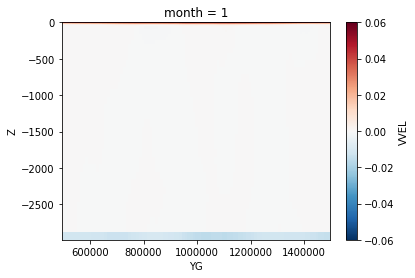

In [12]:
dsMom_clim.VVEL[0].plot()

In [12]:
dsMom_anom = dsMom.groupby('month') - dsMom_clim
ds_anom = ds.groupby('month') - ds_clim
ds_anom

<xarray.Dataset>
Dimensions:   (XC: 100, XG: 100, YC: 200, YG: 200, Z: 40, Zl: 40, Zp1: 41, Zu: 40, time: 1800)
Coordinates:
  * XC        (XC) >f4 5000.0 15000.0 25000.0 35000.0 45000.0 55000.0 ...
  * YC        (YC) >f4 5000.0 15000.0 25000.0 35000.0 45000.0 55000.0 ...
  * XG        (XG) >f4 0.0 10000.0 20000.0 30000.0 40000.0 50000.0 60000.0 ...
  * YG        (YG) >f4 0.0 10000.0 20000.0 30000.0 40000.0 50000.0 60000.0 ...
  * Z         (Z) >f4 -5.0 -15.0 -25.0 -36.0 -49.0 -64.0 -81.5 -102.0 -126.0 ...
  * Zp1       (Zp1) >f4 0.0 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 -113.0 ...
  * Zu        (Zu) >f4 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 -113.0 ...
  * Zl        (Zl) >f4 0.0 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 -113.0 ...
    rA        (YC, XC) >f4 100000000.0 100000000.0 100000000.0 100000000.0 ...
    dxG       (YG, XC) >f4 10000.0 10000.0 10000.0 10000.0 10000.0 10000.0 ...
    dyG       (YC, XG) >f4 10000.0 10000.0 10000.0 10000.0 10000.0 10000.0 ...
    Depth     

In a flat-bottom zonal re-entrant channel flow, the temporal averaging becomes equivalent to zonal averaging as there is no inhomogenuity in the zonal direction, i.e.

$$\overline{c(t,x,z,y)} = \bar{c}(t,z,y) \approx \langle c \rangle(t,z,y) = \langle c(t,z,y,x) \rangle.$$

Reynolds decomposed tracer budget becomes:

$$\frac{\partial \overline{c}}{\partial t} + \frac{\partial}{\partial y} (\overline{v}\ \overline{c}) + \frac{\partial}{\partial z}(\overline{w}\ \overline{c}) = -\frac{\partial}{\partial y}(\overline{v'c'}) - \frac{\partial}{\partial z}(\overline{w'c'}) + K \nabla^2 c + \overline{\dot{c}} \ \ \ (1)$$

where the diffusive term can be re-written as 
$$K \nabla^2 c = -\nabla\cdot (-K\nabla c) = -\nabla \cdot F_{diff}.$$ 
The minus sign in front of $K$ comes from the fact that diffusion is downgradient (high-to-low) and the outer minus sign represents the convergence, i.e. increase in tracer concentration. $\tt{MITgcm}$ outputs the average of $F_{diff}$. It is possible to write this using the transformed-Eulerian mean (TEM) formation but since the contours of tracers are not necessarily aligned with isentropes, it may not be as insightful. Now, taking the volume integral of eqn. (1) gives

$$\int\Big( \frac{\partial \overline{c}}{\partial t} + \frac{\partial}{\partial y} (\overline{v}\ \overline{c}) + \frac{\partial}{\partial z}(\overline{w}\ \overline{c}) = -\frac{\partial}{\partial y}(\overline{v'c'}) - \frac{\partial}{\partial z}(\overline{w'c'}) - \frac{\partial}{\partial z} \overline{F}_v + \overline{\dot{c}}\Big)\ dV$$

and using Gauss' divergence theorem $\int \nabla \cdot (\boldsymbol{v}c)\ dV = \int (\boldsymbol{v}c)\cdot \boldsymbol{n}\ dA$, we get

$$\frac{d}{dt} \int\overline{c}\ dV = \int_I \overline{v}\ \overline{c}\ dA - \int_{III} \overline{v}\ \overline{c}\ dA + \int_{II} \overline{w}\ \overline{c}\ dA - \int_{IV} \overline{w}\ \overline{c}\ dA + \int_I \overline{v'c'}\ dA - \int_{III} \overline{v'c'}\ dA + \int_{II} \overline{w'c'}\ dA - \int_{IV} \overline{w'c'}\ dA - \int \frac{\partial}{\partial z} \overline{F}_v \ dV + \int \overline{\dot{c}}\ dV$$

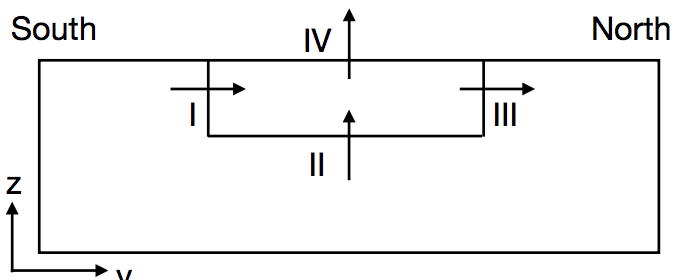

In [52]:
from IPython.display import Image
Image(op.join(ddir, 'tracer-box.png'))

In [13]:
vbar = dsMom_clim.VVEL
wbar = dsMom_clim.WVEL
vp = dsMom_anom.VVEL
wp = dsMom_anom.WVEL

febar = ds_clim.TRAC03
fep = ds_anom.TRAC03
vfe_bar = ds_clim.VTRAC03
wfe_bar = ds_clim.WTRAC03

## $$\overline{v}\overline{Fe}, \ \ \ \overline{w}\overline{Fe}$$

In [14]:
# vbarfebar_N = (xr.DataArray(v_intrp[:,:,nys[1]].data.reshape((5,360,40,100)),
#                             dims=['iYEAR','iDAY','Z','XC'],
#                             coords={'iYEAR':range(5),'iDAY':range(360),
#                                     'Z':v.Z.data,'XC':v.XC.data}
#                            ).groupby_bins('iDAY',tbin,right=False
#                                          ).mean(['iYEAR','iDAY']) 
#                * xr.DataArray(fe[:,:,nys[1]].data.reshape((5,360,40,100)),
#                               dims=['iYEAR','iDAY','Z','XC'],
#                               coords={'iYEAR':range(5),'iDAY':range(360),
#                                       'Z':fe.Z.data,'XC':w.XC.data}
#                              ).groupby_bins('iDAY',tbin,right=False
#                                            ).mean(['iYEAR','iDAY'])
#               ).compute()

# vbarfebar = (xr.DataArray(v_intrp.data.reshape((5,360,40,150,100)),
#                             dims=['iYEAR','iDAY','Z','YG','XC'],
#                             coords={'iYEAR':range(5),'iDAY':range(360),
#                                     'Z':v.Z.data,'YG':v.YG.data,'XC':v.XC.data}
#                            ).groupby_bins('iDAY',tbin,right=False
#                                          ).mean(['iYEAR','iDAY']) 
#                * xr.DataArray(fe_intrp.data.reshape((5,360,40,150,100)),
#                               dims=['iYEAR','iDAY','Z','YG','XC'],
#                               coords={'iYEAR':range(5),'iDAY':range(360),
#                                       'Z':fe_intrp.Z.data,'YG':fe_intrp.YG.data,'XC':fe_intrp.XC.data}
#                              ).groupby_bins('iDAY',tbin,right=False
#                                            ).mean(['iYEAR','iDAY'])
#               ).compute()
# grid = xgd.Grid(ds_clim, periodic=['x'])
fe_intrp = grid.interp(febar, 'Y', **{'boundary':'fill'})
vbarfebar = (vbar * fe_intrp).compute()

vbarfebar

<xarray.DataArray (month: 12, Z: 40, YG: 200)>
array([[[ 0.000000e+00,  0.000000e+00, ...,  2.846319e-06,  7.337632e-07],
        [ 0.000000e+00,  0.000000e+00, ..., -3.789405e-10,  7.196425e-08],
        ...,
        [ 0.000000e+00,  0.000000e+00, ..., -6.582015e-08,  3.534410e-08],
        [ 0.000000e+00,  0.000000e+00, ..., -2.969963e-07, -3.770187e-07]],

       [[ 0.000000e+00,  0.000000e+00, ...,  2.898198e-06,  9.356893e-07],
        [ 0.000000e+00,  0.000000e+00, ..., -1.882069e-08,  1.556989e-07],
        ...,
        [ 0.000000e+00,  0.000000e+00, ..., -6.932645e-08,  2.955765e-08],
        [ 0.000000e+00,  0.000000e+00, ..., -1.663508e-07, -2.543273e-07]],

       ...,

       [[ 0.000000e+00,  0.000000e+00, ...,  2.050800e-06, -6.173682e-07],
        [ 0.000000e+00,  0.000000e+00, ...,  9.949597e-07, -1.355746e-08],
        ...,
        [ 0.000000e+00,  0.000000e+00, ..., -4.756265e-08,  4.596766e-08],
        [ 0.000000e+00,  0.000000e+00, ..., -2.272047e-07, -2.884852e-07

In [15]:
# grid = xgd.Grid(dsMom_clim, periodic=['x'])
w_intrp = grid.interp(wbar, 'Z', **{'boundary':'fill'})
# wbarfebar = (xr.DataArray(w_intrp.data.reshape((5,360,40,150,100)),
#                           dims=['iYEAR','iDAY','Z','YC','XC'],
#                           coords={'iYEAR':range(5),'iDAY':range(360),
#                                   'Z':w_intrp.Z.data,'YC':w_intrp.YC.data,
#                                   'XC':w_intrp.XC.data}
#                          ).groupby_bins('iDAY',tbin,right=False
#                                        ).mean(['iYEAR','iDAY']) 
#              * xr.DataArray(fe.data.reshape((5,360,40,150,100)),
#                             dims=['iYEAR','iDAY','Z','YC','XC'],
#                             coords={'iYEAR':range(5),'iDAY':range(360),
#                                   'Z':fe.Z.data,'YC':fe.YC.data,'XC':w.XC.data}
#                            ).groupby_bins('iDAY',tbin,right=False
#                                          ).mean(['iYEAR','iDAY'])
#             ).compute()

wbarfebar = w_intrp * febar
wbarfebar

<xarray.DataArray (month: 12, Z: 40, YC: 200)>
array([[[ 0.000000e+00,  1.716486e-09, ..., -1.057793e-09, -3.680882e-10],
        [ 0.000000e+00,  3.753849e-09, ..., -2.078299e-09, -7.708935e-10],
        ...,
        [ 0.000000e+00,  1.739385e-09, ...,  3.089035e-10, -3.734160e-09],
        [ 0.000000e+00,  9.374318e-10, ...,  4.115833e-10, -1.941976e-09]],

       [[ 0.000000e+00,  1.230173e-09, ..., -9.791237e-10, -4.652245e-10],
        [ 0.000000e+00,  2.688909e-09, ..., -1.873605e-09, -1.010892e-09],
        ...,
        [ 0.000000e+00,  2.522844e-09, ...,  4.037177e-10, -2.489099e-09],
        [ 0.000000e+00,  1.295940e-09, ...,  4.528282e-10, -1.309887e-09]],

       ...,

       [[ 0.000000e+00,  5.285266e-10, ..., -1.340555e-09,  3.022439e-10],
        [ 0.000000e+00,  1.404481e-09, ..., -3.178871e-09,  6.177223e-10],
        ...,
        [ 0.000000e+00,  2.595631e-09, ...,  1.537589e-10, -2.758264e-09],
        [ 0.000000e+00,  1.358938e-09, ...,  3.152803e-10, -1.485832e-09

In [25]:
vbarfebar_I = grid.cumsum(vbarfebar  * ds.hFacS.mean(['XC'])*ds.drF,
                          'Z', to='outer', boundary='fill')[:,:,nys].compute()
vbarfebar_III = grid.cumsum(vbarfebar * ds.hFacS.mean(['XC'])*ds.drF,
                            'Z', to='outer', boundary='fill')[:,:,nyn].compute()
vbarfebar_III

<xarray.DataArray 'concatenate-dc8de635182453d3ef6d5571e7b3f18b' (month: 12, Zp1: 41)>
array([[ 0.      ,  0.000269,  0.000467, ...,  0.00077 ,  0.00078 , -0.000379],
       [ 0.      ,  0.000279,  0.000486, ...,  0.000796,  0.000801, -0.000409],
       [ 0.      ,  0.000277,  0.000485, ...,  0.000641,  0.000646, -0.000332],
       ...,
       [ 0.      ,  0.000224,  0.000401, ...,  0.000809,  0.000815, -0.000325],
       [ 0.      ,  0.00024 ,  0.000427, ...,  0.000879,  0.000882, -0.000366],
       [ 0.      ,  0.000246,  0.000428, ...,  0.000808,  0.000815, -0.000346]],
      dtype=float32)
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
  * Zp1      (Zp1) >f4 0.0 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 -113.0 ...
    YG       >f4 1500000.0

In [46]:
wbarfebar_II = grid.interp(wbarfebar * ds.hFacC.mean(['XC'])*ds.rA.mean(['XC']),
                          'Z', to='outer', boundary='fill')[:,:,nys:nyn].sum(['YC']).compute()
wbarfebar_IV = grid.interp(wbarfebar * ds.hFacC.mean(['XC'])*ds.rA.mean(['XC']),
                          'Z', to='outer', boundary='fill')[:,0,nys:nyn].sum(['YC']).compute()
wbarfebar_IV

<xarray.DataArray 'mul-8758ead51d90f3770e040068e1a094dd' (month: 12)>
array([0.089618, 0.083499, 0.108826, 0.118337, 0.101015, 0.118404, 0.15034 ,
       0.140486, 0.14424 , 0.162231, 0.231978, 0.176359], dtype=float32)
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
    Zp1      >f4 0.0

## $$\overline{v'Fe'} = \overline{v\ Fe} - \overline{v}\overline{Fe}$$

$$\int_I \overline{v'Fe'} dA = \int_I \overline{v'Fe'} dy\ dz$$

In [28]:
# vpfep = np.zeros((5,360,40,150,100))
# vpfep[:] = np.nan
# # vpfep_N = vpfep_S.copy()

# # np_vfeN = vfe[:,:,ny[1]].data.reshape((5,360,40,100))
# np_vfe = vfe.data.reshape((5,360,40,150,100))

# for j in range(5):
#     for i in range(12):
# #         vpfep_N[j,i*30:i*30+30] = np_vfeN[j,i*30:i*30+30] - vbarfebar_N.data[i]
#         vpfep[j,i*30:i*30+30] = np_vfe[j,i*30:i*30+30] - vbarfebar.data[i]

# # vpfep_N = xr.DataArray(vpfep_N, dims=['iYEAR','iDAY','Z','XC'],
# #                        coords={'iYEAR':range(5),'iDAY':range(360),
# #                                'Z':vfe.Z.data,'XC':vfe.XC.data}
# #                       ).groupby_bins('iDAY',tbin,right=False
# #                                     ).mean(['iYEAR','iDAY'])
# vpfep_bar = xr.DataArray(vpfep, dims=['iYEAR','iDAY','Z','YG','XC'],
#                          coords={'iYEAR':range(5),'iDAY':range(360),
#                                  'Z':vfe.Z.data,'YG':vfe.YG.data,'XC':vfe.XC.data}
#                         ).groupby_bins('iDAY',tbin,right=False
#                                       ).mean(['iYEAR','iDAY']).compute()

vpfep_bar = vfe_bar - vbarfebar
# vpfep_bar_I = np.cumsum(vpfep_bar * (ds.hFacS.mean(['XC'])*dsMom_clim.drF.data[:,np.newaxis]),
#                         axis=1)[:,:,0].compute()
vpfep_bar_I = grid.cumsum(vpfep_bar * ds.hFacS.mean(['XC'])*dsMom_clim.drF, 
                          'Z', to='outer', boundary='extend')[:,:,nys].compute()
# vpfep_bar_III = np.cumsum(vpfep_bar * (ds.hFacS.mean(['XC'])*dsMom_clim.drF.data[:,np.newaxis]),
#                           axis=1)[:,:,-1].compute()
vpfep_bar_III = grid.cumsum(vpfep_bar * ds.hFacS.mean(['XC'])*dsMom_clim.drF, 
                            'Z', to='outer', boundary='extend')[:,:,nyn].compute()
vpfep_bar_I.attrs['unit'] = 'mmol Fe m^-1 s^-1'
vpfep_bar_III.attrs['unit'] = 'mmol Fe m^-1 s^-1'
vpfep_bar_III

<xarray.DataArray 'concatenate-dbc4fd97588cca9871a885d3c8105309' (month: 12, Zp1: 41)>
array([[1.339631e-06, 1.339631e-06, 2.783963e-06, ..., 1.150689e-04,
        1.072535e-04, 9.823040e-05],
       [8.683492e-07, 8.683492e-07, 1.830413e-06, ..., 1.163529e-04,
        1.087260e-04, 9.948119e-05],
       [1.297103e-06, 1.297103e-06, 2.638153e-06, ..., 2.267005e-04,
        2.161731e-04, 2.068142e-04],
       ...,
       [2.500783e-06, 2.500783e-06, 4.960148e-06, ..., 7.615572e-05,
        6.813853e-05, 5.798487e-05],
       [4.857429e-06, 4.857429e-06, 9.766518e-06, ..., 2.243475e-04,
        2.144887e-04, 2.059160e-04],
       [3.149889e-06, 3.149889e-06, 6.424107e-06, ..., 9.227480e-05,
        8.497667e-05, 8.015703e-05]], dtype=float32)
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
  * Zp1      (Zp1) >f4 0.0 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 -113.0 ...
    YG       >f4 1500000.0
Attributes:
    unit:     mmol Fe m^-1 s^-1

In [130]:
# vpfep_bar_I = xr.DataArray(grid.interp(grid.cumsum((vpfep_xgd * (vpfep_xgd.hFacS*vpfep_xgd.dxG
#                                                                  * ds.drC[1:].data[:,np.newaxis,np.newaxis]
#                                                                 )
#                                                    )[:,:,0], 'Z', **{'boundary':'fill'}
#                                                   ), 'Z', **{'boundary':'fill'}
#                                       ).mean(['XC']).data.reshape((5,360,40)),
#                            dims=['iYEAR','iDAY','Z'],
#                            coords={'iYEAR':range(5),'iDAY':range(360),'Z':ds.Z.data}
#                           ).groupby_bins('iDAY',tbins,right=False
#                                         ).mean(['iYEAR','iDAY']).compute()
# vpfep_bar_I.attrs['unit'] = 'mmol Fe s^-1'
# vpfep_bar_I

<xarray.DataArray 'reshape-9e0c17d228e2b165f2284c656a1469e7' (iDAY_bins: 12, Z: 40)>
array([[0.585455, 1.605861, 2.306245, ..., 4.219624, 4.177438, 2.077909],
       [0.580972, 1.574032, 2.1822  , ..., 3.22443 , 3.197112, 1.590582],
       [0.612323, 1.681563, 2.432588, ..., 3.291962, 3.238358, 1.605608],
       ...,
       [0.527661, 1.463837, 2.212477, ..., 4.407513, 4.376255, 2.181949],
       [0.538624, 1.487998, 2.230112, ..., 4.32264 , 4.295535, 2.140825],
       [0.603403, 1.666899, 2.475971, ..., 4.961192, 4.897818, 2.432115]])
Coordinates:
  * iDAY_bins  (iDAY_bins) object [0, 30) [30, 60) [60, 90) [90, 120) ...
  * Z          (Z) >f4 -5.0 -15.0 -25.0 -36.0 -49.0 -64.0 -81.5 -102.0 ...
Attributes:
    unit:     mmol Fe s^-1

## $$\overline{w'Fe'} = w\ Fe - \overline{w}\overline{Fe}$$

$$\int_{II} \overline{w'Fe'} dA = \int_{II} \overline{w'Fe'} dx\ dy$$

In [47]:
# wpfep = np.zeros((5,360,40,150,100))
# wpfep[:] = np.nan

# np_wfe = wfe.data.reshape((5,360,40,150,100))

# for j in range(5):
#     for i in range(12):
#         wpfep[j,i*30:i*30+30] = np_wfe[j,i*30:i*30+30] - wbarfebar.data[i]

# wpfep_bar = xr.DataArray(wpfep, dims=['iYEAR','iDAY','Z','YC','XC'],
#                          coords={'iYEAR':range(5),'iDAY':range(360),
#                                  'Z':wfe.Z.data,'YC':wfe.YC.data,'XC':wfe.XC.data}
#                         ).groupby_bins('iDAY',tbin,right=False
#                                       ).mean(['iYEAR','iDAY']).compute()
# wpfep_bar

wpfep_bar = wfe_bar - wbarfebar
wpfep_bar_II = grid.interp(wpfep_bar * ds.hFacC.mean(['XC'])*ds.rA.mean(['XC']),
                          'Z', to='outer', boundary='fill')[:,:,nys:nyn].sum(['YC']).compute()
wpfep_bar_II.attrs['unit'] = 'mmol Fe m^-1 s^-1'

wpfep_bar_IV = grid.interp(wpfep_bar * ds.hFacC.mean(['XC'])*ds.rA.mean(['XC']),
                          'Z', to='outer', boundary='fill')[:,0,nys:nyn].sum(['YC']).compute()
wpfep_bar_IV.attrs['unit'] = 'mmol Fe m^-1 s^-1'

wpfep_bar_II

<xarray.DataArray 'mul-eabb63a380766ec67f0d431f83cc6c7d' (month: 12, Zp1: 41)>
array([[-0.086676, -0.02798 ,  0.280977, ...,  0.178081,  0.88293 ,  0.792193],
       [-0.084453, -0.131937, -0.035132, ...,  0.186511,  1.30862 ,  1.215945],
       [-0.094581, -0.176213, -0.096203, ...,  0.145079,  0.829062,  0.752055],
       ...,
       [-0.163916, -0.569184, -0.985479, ...,  0.152014,  0.944367,  0.860582],
       [-0.212469, -0.653147, -1.020807, ...,  0.199558,  1.231943,  1.122631],
       [-0.165451, -0.364748, -0.352651, ...,  0.145938,  0.894424,  0.81927 ]],
      dtype=float32)
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
  * Zp1      (Zp1) >f4 0.0 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 -113.0 ...
Attributes:
    unit:     mmol Fe m^-1 s^-1

In [138]:
# tbins = range(0,390,30)
# wpfep_bar_II = wpfep_bar.sum(['YC']).mean(['XC']).compute()
# wpfep_bar_II.attrs['unit'] = 'mmol Fe s^-1'
# wpfep_bar_II

<xarray.DataArray (iDAY_bins: 12, Z: 40)>
array([[ 1.200686e-08,  1.160301e-08,  9.571568e-09, ...,  2.112823e-09,
         1.832979e-09, -4.273500e-08],
       [ 1.258856e-08,  9.917272e-09,  5.678108e-09, ...,  1.942459e-09,
         1.599268e-09, -3.676368e-08],
       [ 1.226937e-08,  9.335457e-09,  5.637469e-09, ...,  1.821549e-09,
         1.527754e-09, -3.406336e-08],
       ...,
       [ 7.640826e-09, -9.375356e-11, -6.404109e-09, ...,  1.707410e-09,
         1.476186e-09, -4.033115e-08],
       [ 7.530870e-09, -3.184160e-11, -6.148357e-09, ...,  2.341497e-09,
         2.015786e-09, -4.017588e-08],
       [ 9.100866e-09,  5.382187e-09,  1.945456e-09, ...,  1.954784e-09,
         1.553492e-09, -4.203440e-08]])
Coordinates:
  * iDAY_bins  (iDAY_bins) object [0, 30) [30, 60) [60, 90) [90, 120) ...
  * Z          (Z) >f4 -5.0 -15.0 -25.0 -36.0 -49.0 -64.0 -81.5 -102.0 ...
Attributes:
    unit:     mmol Fe s^-1

## $$\frac{d}{dt} \int \overline{Fe}\ dV$$

In [126]:
# tbin = range(0,390,30)
# febar = xr.DataArray(grid.interp(grid.cumsum(fe * (fe.hFacC*fe.rA*ds.drC[1:].data[:,np.newaxis,np.newaxis]),
#                                              'Z', **{'boundary':'fill'}
#                                             ), 'Z', **{'boundary':'fill'}
#                                 ).sum(['YC']).mean(['XC']).data.reshape((5,360,40)),
#                      dims=['iYEAR','iDAY','Z'],
#                      coords={'iYEAR':range(5),'iDAY':range(360),'Z':ds.Z.data}
#                     ).groupby_bins('iDAY',tbin,right=False
#                                   ).mean(['iYEAR','iDAY'])
# febar

<xarray.DataArray 'reshape-3682009b481afc32734afdb007581730' (iDAY_bins: 12, Z: 40)>
dask.array<shape=(12, 40), dtype=float64, chunksize=(1, 1)>
Coordinates:
  * iDAY_bins  (iDAY_bins) object [0, 30) [30, 60) [60, 90) [90, 120) ...
  * Z          (Z) >f4 -5.0 -15.0 -25.0 -36.0 -49.0 -64.0 -81.5 -102.0 ...

In [42]:
febar_vol = grid.interp(febar * ds.hFacC.mean(['XC'])*ds.rA.mean(['XC'])*ds.drF,
                        'Z', to='outer', boundary='fill'
                       )[:,:,nys:nyn].sum(['YC'])
dfebardt = (-febar_vol + febar_vol.roll(month=-1).data).compute() / (3e1*24.*36e2)
dfebardt.attrs['unit'] = 'mmol Fe s^-1'
dfebardt

<xarray.DataArray (month: 12, Zp1: 41)>
array([[ 0.218636,  0.435841,  0.431316, ..., -0.199185, -0.224099, -0.117716],
       [ 0.109338,  0.218844,  0.219344, ..., -0.120864, -0.143136, -0.078679],
       [ 0.167159,  0.334381,  0.334427, ..., -0.110741, -0.141457, -0.080086],
       ...,
       [-0.054151, -0.107904, -0.106515, ..., -0.213432, -0.185012, -0.083444],
       [-1.009934, -2.016276, -2.004938, ..., -0.225704, -0.223531, -0.109654],
       [-0.916159, -1.834553, -1.841668, ...,  2.11958 ,  1.988642,  0.965309]],
      dtype=float32)
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
  * Zp1      (Zp1) >f4 0.0 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 -113.0 ...
Attributes:
    unit:     mmol Fe s^-1

## $$\int_V \frac{\partial}{\partial z} F_{diff}\ dV = \int_A \big[F_{diff}(0) - F_{diff}(z)\big]\ dA$$

In [35]:
diffe_bar = ds_clim.DFrITr03

diffe_bar

<xarray.DataArray 'DFrITr03' (month: 12, Zl: 40, YC: 200)>
array([[[ 0.000000e+00,  0.000000e+00, ...,  0.000000e+00,  0.000000e+00],
        [ 0.000000e+00,  5.915197e-02, ..., -1.211244e-04, -4.245473e-05],
        ...,
        [ 0.000000e+00,  0.000000e+00, ...,  0.000000e+00,  0.000000e+00],
        [ 0.000000e+00, -2.183694e-17, ...,  0.000000e+00,  0.000000e+00]],

       [[ 0.000000e+00,  0.000000e+00, ...,  0.000000e+00,  0.000000e+00],
        [ 0.000000e+00,  6.285846e-02, ..., -1.004961e-04, -3.000156e-05],
        ...,
        [ 0.000000e+00,  0.000000e+00, ...,  0.000000e+00,  0.000000e+00],
        [ 0.000000e+00, -2.713311e-07, ...,  0.000000e+00,  0.000000e+00]],

       ...,

       [[ 0.000000e+00,  0.000000e+00, ...,  0.000000e+00,  0.000000e+00],
        [ 0.000000e+00,  3.815640e-03, ..., -6.210282e-04, -5.833267e-04],
        ...,
        [ 0.000000e+00,  0.000000e+00, ...,  0.000000e+00,  0.000000e+00],
        [ 0.000000e+00,  2.206739e-06, ...,  0.000000e+00,  

In [37]:
diffe_II = xr.DataArray(np.zeros_like(diffe_bar),
                        dims=wbarfebar.dims, coords=wbarfebar.coords)
diffe_II[:] = np.nan
for i in range(len(wbarfebar.Z)):
    diffe_II[:,i] = diffe_bar[:,0].data - diffe_bar[:,i].data
    
# tbin = range(0,390,30)
# diffe_II = xr.DataArray(diffe_II.mean(axis=-1).sum(axis=-1).reshape((5,360,40)),
#                         dims=['iYEAR','iDAY','Z'],
#                         coords={'iYEAR':range(5),'iDAY':range(360),'Z':ds.Z.data}
#                        ).groupby_bins('iDAY',tbin,right=False
#                                      ).mean(['iYEAR','iDAY']).compute()


diffe_II = grid.interp(diffe_II, 'Z', **{'to':'outer','boundary':'fill'}
                      )[:,:,nys:nyn].sum(['YC'])
diffe_II.attrs['unit'] = 'mmol Fe s^-1'
diffe_II

<xarray.DataArray (month: 12, Zp1: 41)>
array([[ 0.000000e+00, -1.258777e+00, -3.746570e+00, ...,  3.696090e-05,
         3.749698e-03,  3.712737e-03],
       [ 0.000000e+00, -3.405809e-01, -1.036018e+00, ...,  3.861445e-05,
         4.720092e-03,  4.681478e-03],
       [ 0.000000e+00, -4.781011e-01, -1.432511e+00, ...,  7.122125e-05,
         5.635756e-03,  5.564535e-03],
       ...,
       [ 0.000000e+00, -1.519476e-01, -4.779132e-01, ...,  1.201560e-04,
         2.135715e-03,  2.015559e-03],
       [ 0.000000e+00, -4.852445e-01, -1.608956e+00, ...,  8.609717e-05,
         2.493361e-03,  2.407264e-03],
       [ 0.000000e+00, -2.946750e+00, -8.987459e+00, ...,  4.107998e-05,
         5.834050e-04,  5.423250e-04]], dtype=float32)
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
  * Zp1      (Zp1) >f4 0.0 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 -113.0 ...
Attributes:
    unit:     mmol Fe s^-1

## $$\int \overline{\dot{Fe}}\ dV$$

In [66]:
nx = 1e2
Lx = nx*1e4

ss = (dfebardt*nx - ((vbarfebar_I-vbarfebar_III + vpfep_bar_I-vpfep_bar_III)*Lx
                     + (wbarfebar_II-wbarfebar_IV.values[:,np.newaxis] 
                        + wpfep_bar_II-wpfep_bar_IV.values[:,np.newaxis]
                       )*nx
                    ) 
      + diffe_II*nx
     )
ss.attrs['unit'] = 'mmol Fe s^-1'
ss

<xarray.DataArray (month: 12, Zp1: 41)>
array([[ 1.319176e+01, -6.668827e+01, -3.369284e+02, ..., -8.072714e+01,
        -8.820697e+01, -2.305730e+02],
       [ 1.254993e+01,  1.414270e+01, -5.335436e+01, ..., -8.984388e+01,
        -9.579803e+01, -3.284236e+02],
       [ 1.546332e+01,  3.087578e-01, -1.021163e+02, ...,  7.868221e+01,
         6.476528e+01, -8.208333e+01],
       ...,
       [-7.477385e+00, -1.603097e+01, -4.497922e+01, ..., -2.021709e+02,
        -2.080500e+02, -3.731491e+02],
       [-1.001450e+02, -2.362668e+02, -3.492395e+02, ..., -9.525528e+01,
        -1.053942e+02, -3.142890e+02],
       [-1.009129e+02, -4.870835e+02, -1.128241e+03, ...,  1.242345e+01,
        -3.339365e+00, -2.656474e+02]], dtype=float32)
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
  * Zp1      (Zp1) >f4 0.0 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 -113.0 ...
Attributes:
    unit:     mmol Fe s^-1

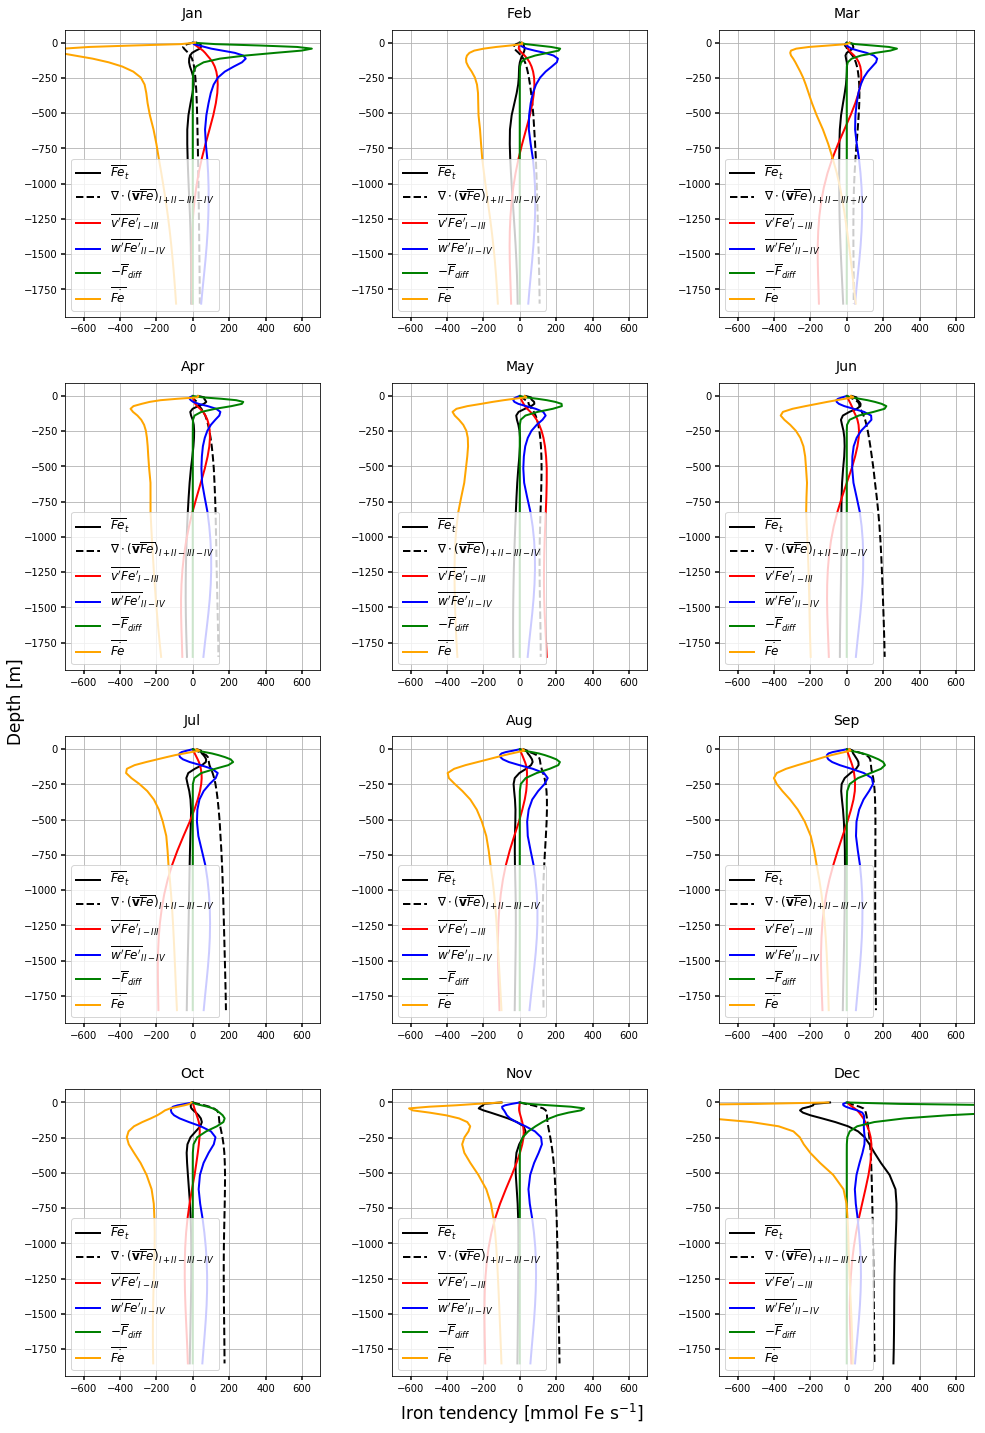

In [67]:
colors = ['pink','r','m','orange','brown','k','purple','indigo','b','c','g','y']
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
nz = 30

fig, axes = plt.subplots(ncols=3, nrows=4, figsize=(14,20))
for j in range(4):
    for i in range(3):
        axes[j,i].plot(dfebardt[j*3+i,:nz]*nx, dfebardt.Zp1[:nz], 'k',
                       lw=2, label=r'$\overline{Fe}_t$')
        axes[j,i].plot(((vbarfebar_I-vbarfebar_III)*Lx 
                        + (wbarfebar_II-wbarfebar_IV.values[:,np.newaxis])*nx
                       )[j*3+i,:nz], 
                       vbarfebar_I.Zp1[:nz], 'k--',
                       lw=2, label=r'$\nabla\cdot (\overline{\mathbf{v}}\overline{Fe})_{I+II-III-IV}$')
#         axes[j,i].plot(-wbarfebar_II[j*3+i,:nz]*Lx, wbarfebar_II.Z[:nz], 'b',
#                        lw=2, label=r'$-\overline{w}\overline{Fe}$')
        axes[j,i].plot((vpfep_bar_I-vpfep_bar_III)[j*3+i,:nz]*Lx, vpfep_bar_I.Zp1[:nz], 'r',
                       lw=2, label=r"$\overline{v' Fe'}_{I-III}$")
        axes[j,i].plot((wpfep_bar_II-wpfep_bar_IV.values[:,np.newaxis])[j*3+i,:nz]*nx, wpfep_bar_II.Zp1[:nz], 'b',
                       lw=2, label=r"$\overline{w' Fe'}_{II-IV}$")
        axes[j,i].plot(-diffe_II[j*3+i,:nz]*nx, diffe_II.Zp1[:nz], 'g',
                       lw=2, label=r"$-\overline{F}_{diff}$")
        axes[j,i].plot(ss[j*3+i,:nz], ss.Zp1[:nz], 'orange',
                       lw=2, label=r"$\overline{\dot{Fe}}$")
#         ax2 = axes[j,i].twiny()
#         p2, = ax2.plot((np.absolute(wpfep_bar_II*Lx+diffe_II*nx)/
#                        np.absolute(vbarfebar_I-vbarfebar_III+wbarfebar_II
#                                    +vpfep_bar_I-vpfep_bar_III)*Lx)[j*3+i,:nz],
#                        diffe_II.Z[:nz], 'grey', lw=3, alpha=0.6
#                       )
# #         ax2.set_xlim([.1,1e1])
#         ax2.set_xscale('log')
#         ax2.xaxis.label.set_color(p2.get_color())

        tkw = dict(size=4, width=1.5)
#         ax2.tick_params(axis='x', colors=p2.get_color(), **tkw)
        axes[j,i].tick_params(axis='both', **tkw)
        
        axes[j,i].set_title(months[j*3+i],fontsize=14,y=1.02)
        axes[j,i].legend(loc='lower left', fontsize=12)
        axes[j,i].set_xlim([-7e2,7e2])
        axes[j,i].grid(True)

# fig.subplots_adjust(right=0.8)
# cbar_ax = fig.add_axes([0.84, 0.2, 0.03, 0.6])
# cbar = fig.colorbar(cax, cax=cbar_ax)
# cbar.set_label(r'[mM N/m$^3$]',fontsize=12)

fig.text(0.01, 0.5, 'Depth [m]', 
         va='center', rotation='vertical', fontsize=17)
fig.text(0.4, 0.005, 'Iron tendency [mmol Fe s$^{-1}$]', 
         va='center', rotation='horizontal', fontsize=17)

plt.tight_layout(pad=2.7)
# plt.grid(True)
plt.savefig(op.join(ddir,'IronFlux_3D2804_monthlyclim.pdf'))

For iron specifically, the governing equation is

$$\frac{\partial Fe}{\partial t} = -\nabla\cdot (\boldsymbol{v}\ Fe) - \nabla\cdot \boldsymbol{F}_{diff} + \dot{Fe}_{bio} + \dot{Fe}_{chem} $$


where 

$$\dot{Fe}_{bio} = - \sum [\mu_j P_j M_{ij}]$$ 
$$\dot{Fe}_{chem} = r_{DOFe}DOFe + r_{POFe}POFe - c_{scav}Fe' + \alpha F_{atmos}.$$ 

$\mu$ and $M$ are the phytoplankton growthrates and Redfield ratio of element $i$ to phosphorus for phytoplankton $j$.